# Work flow for Machine Learning Projects

1. **Proplem Definition**
2. **Data Collection**
3. **Data Preprocessing**
4. **Exploratory Data Analysis (EDA)**
5. **Feature Engineering**
6. **Model Selection**
7. **Model Training**
8. **Model Evaluation**
9. **Model Deployment**

# ------------------------

## Problem Definition
#### We want to build a simple machine learning model that can identify the species of an Iris flower—from setosa, versicolor, or virginica—using measurements like sepal and petal sizes. Using Scikit-learn, we'll train the model on the Iris dataset and check how well it can predict species on new data. This project will help us understand the basics of classification in machine learning.

## Data Collection


In [70]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# collect data
df = pd.read_csv(r'data/iris.csv')

In [72]:
# show simple of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Meta Data of Iris Dataset

### Background of dataset
- The data set contains 3 classes of 50 instances each,
    -  where each class refers to a type of iris plant.
- One class is linearly separable from the other 2, 
    - the latter are NOT linearly separable from each other.

### Variable spesifications
Variables of the dataset:

1. 'sepal_length' (cm){Continuous}
2. 'sepal_width' (cm){Continuous}
3. 'petal_length' (cm){Continuous}
4. 'petal_width' (cm){Continuous}
5. class of target variable 'species': {Categorical}
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

In [73]:
# Dataset information (record size, variables, non-null counts, dtypes  etc...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
# Descriptive stats of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [75]:
# Distribution of target variable's class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of the target classes'}>

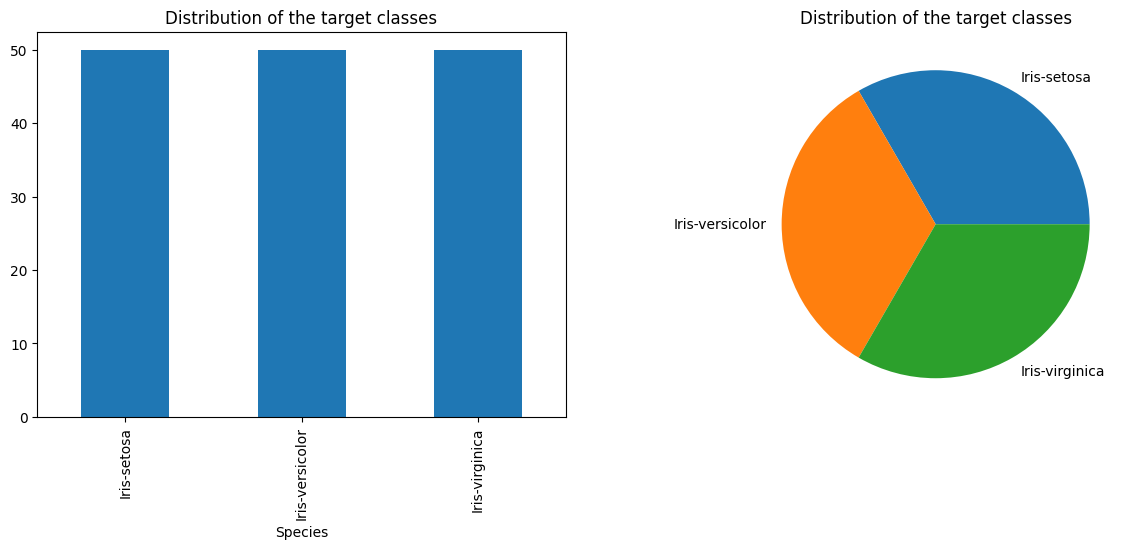

In [76]:
# Distribution of target variable's class
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title("Distribution of the target classes")
df['Species'].value_counts().plot.bar()
plt.subplot(1,2,2)
plt.title("Distribution of the target classes")
df['Species'].value_counts().plot.pie(label="")

# Data preprocessing

In [77]:
df=df.iloc[:,1:]

In [78]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
df["Species"].dtype

dtype('O')

In [80]:
df['Species'] = df['Species'].astype('category')


In [81]:
df['Species'].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False, categories_dtype=object)

## Outliers Analysis

<Axes: >

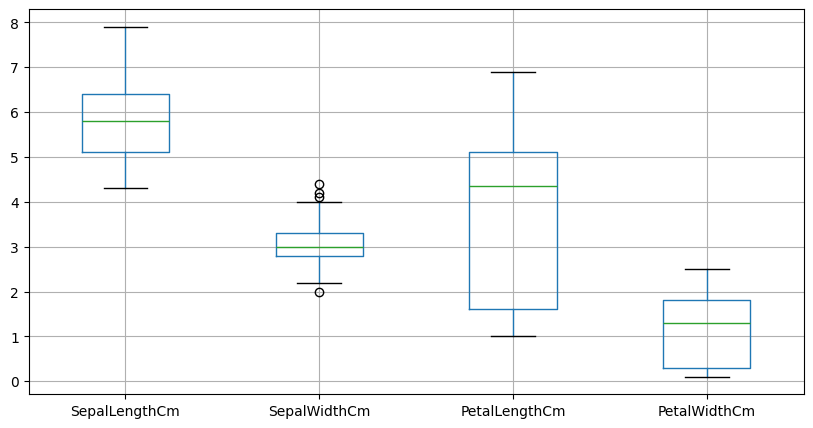

In [82]:
plt.figure(figsize=(10,5))
df.boxplot()

<Axes: >

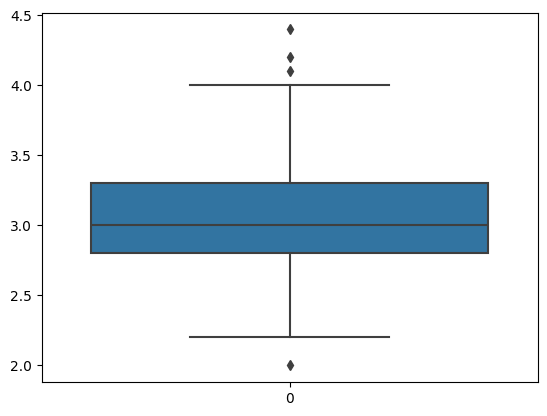

In [83]:
sns.boxplot(df["SepalWidthCm"])

### IQR Calculation

In [84]:
df_float64=df.select_dtypes('float64')
print(df_float64)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [85]:
for column in df_float64:
    def IQR_calculator(column):
        Q1=df[column].quantile(.25)
        Q3=df[column].quantile(.75)
        IQR= Q3 - Q1

        lower_value = Q1 -1.5*IQR
        upper_value = Q3 -1.5*IQR
        
        return IQR, lower_value, upper_value


In [86]:
for column in df:
    def find_outlier(column, lower_value, upper_value)->pd.DataFrame:
        df_num = df.select_dtypes(include=["float64, int64"])
        boolean_outlier_df = (df_num < lower_value) | (upper_value < df_num)
        return boolean_outlier_df, df_num.columns

In [87]:
for column in df_float64:
    is_outlier, num_cols = find_outlier(column,lower_value, upper_value)
    print(f"{column} {is_outlier}")

NameError: name 'lower_value' is not defined

In [ ]:
is_outlier.sum()

NameError: name 'is_outlier' is not defined

In [ ]:
num_cols = df_float64.columns
num_cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
# Getting Outlier values
outlier_values = df[num_cols][is_outlier]
outlier_values.head()

NameError: name 'is_outlier' is not defined

## Eploratory Data Analysis (EDA)

### Dataset Spesifications

In [88]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [89]:
# Description for data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [90]:
pd.unique(df.select_dtypes(include=["category"]).values.ravel('k'))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Univariate Analysis

#### Target Variable

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Temp\ipykernel_30740\4241623599.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Species"].value_counts(), rug=True, hist=False);
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

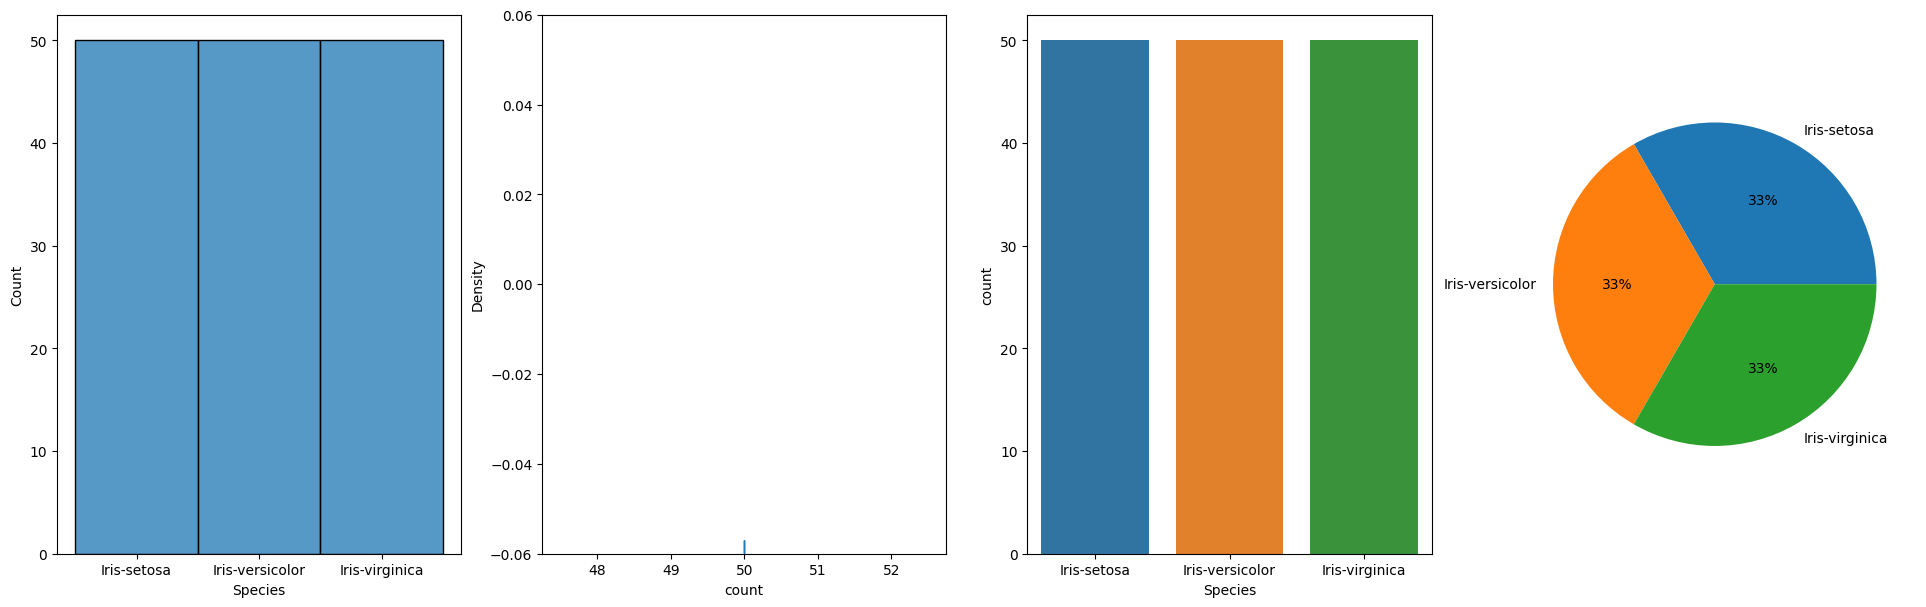

In [91]:
plt.figure(figsize=(24,7))

plt.subplot(1,4,1)
sns.histplot(df, x="Species");

plt.subplot(1,4,2)
sns.distplot(df["Species"].value_counts(), rug=True, hist=False);

plt.subplot(1,4,3)
sns.countplot(data=df, x="Species");

plt.subplot(1,4,4)
plt.pie(df["Species"].value_counts(), labels=df["Species"].unique(), autopct="%.0f%%");

### Feature Variable

#### setting the plotting params

In [92]:
# Extracting the categories
cols, rows = 2, 2
num_cols = df.select_dtypes(exclude='category').columns

##### Histplot Distribution

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

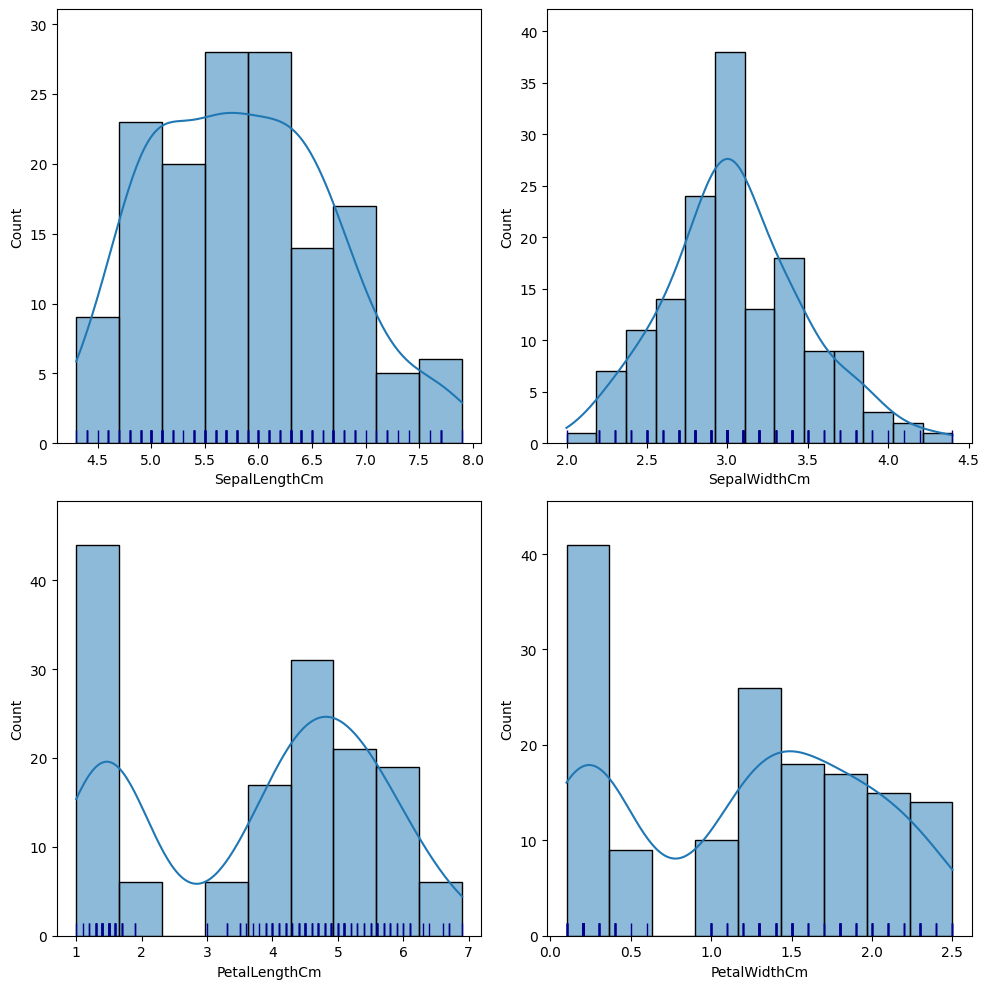

In [93]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
        
fig.tight_layout()  
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_30740\258104198.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Temp\ipykernel_30740\258104198.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting 

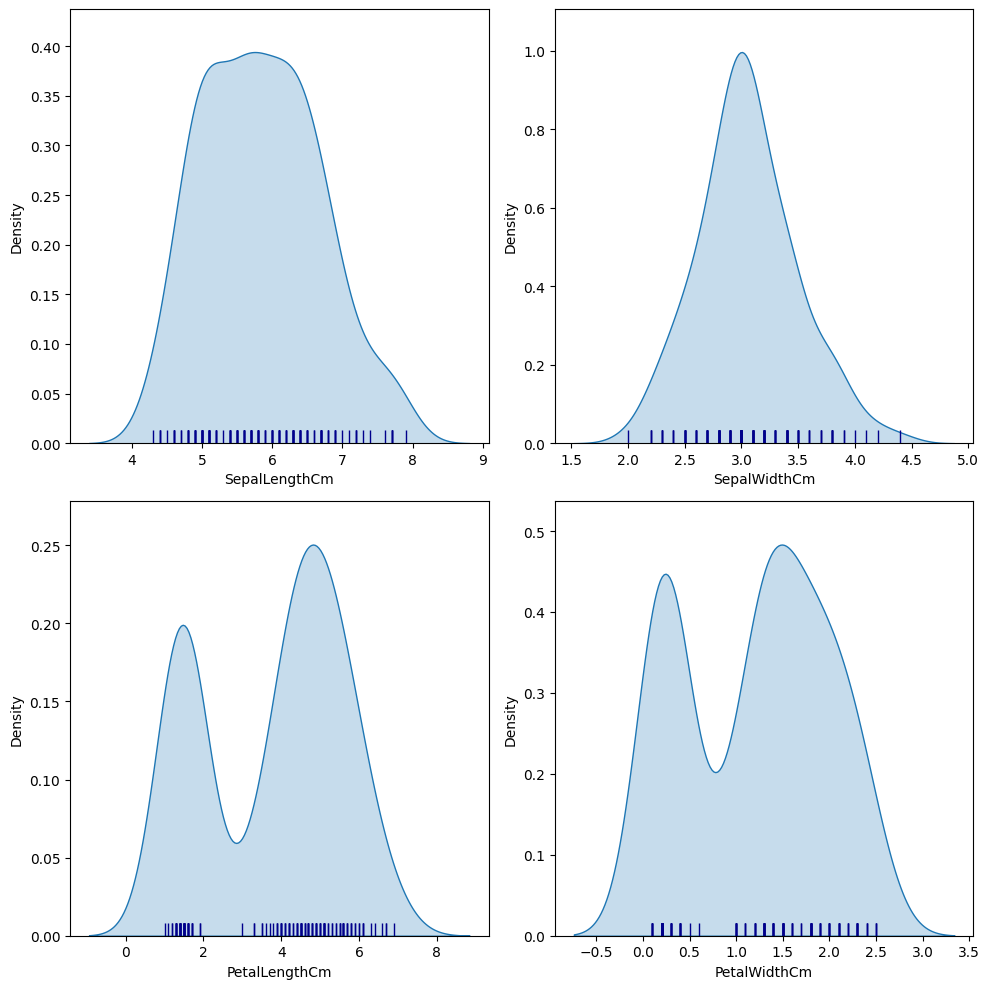

In [94]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

#### [boxplot] Distributions with quartiles (Outlier)

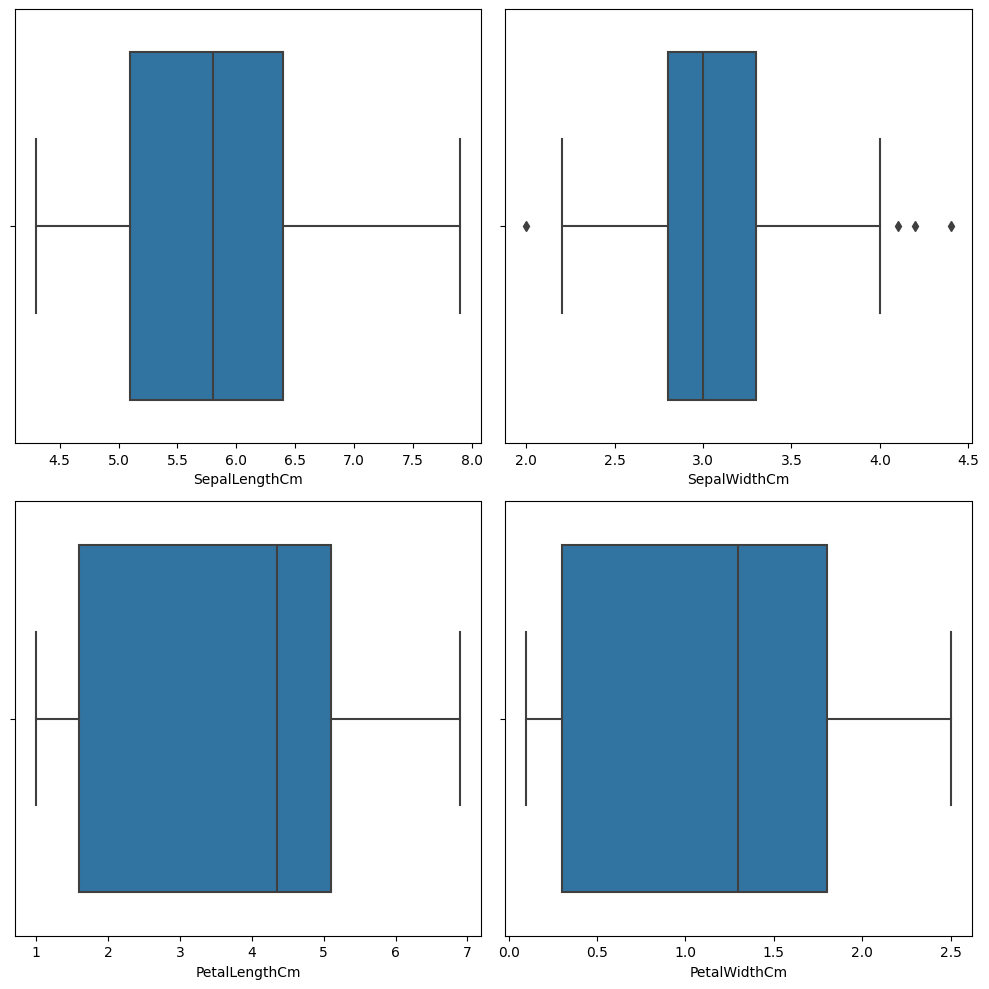

In [95]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

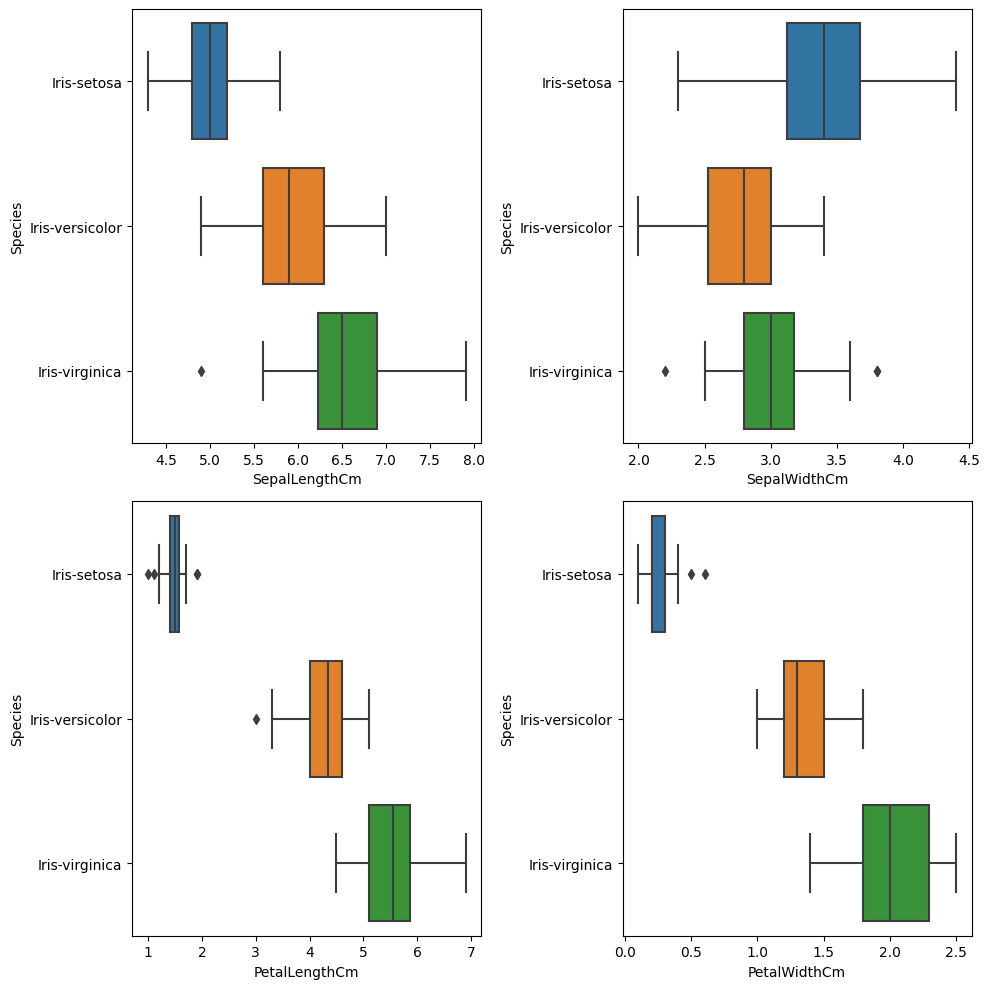

In [96]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], y=df["Species"], ax=ax)
    
fig.tight_layout()  
plt.show()


#### [violinplot] Distributions with quartiles and density

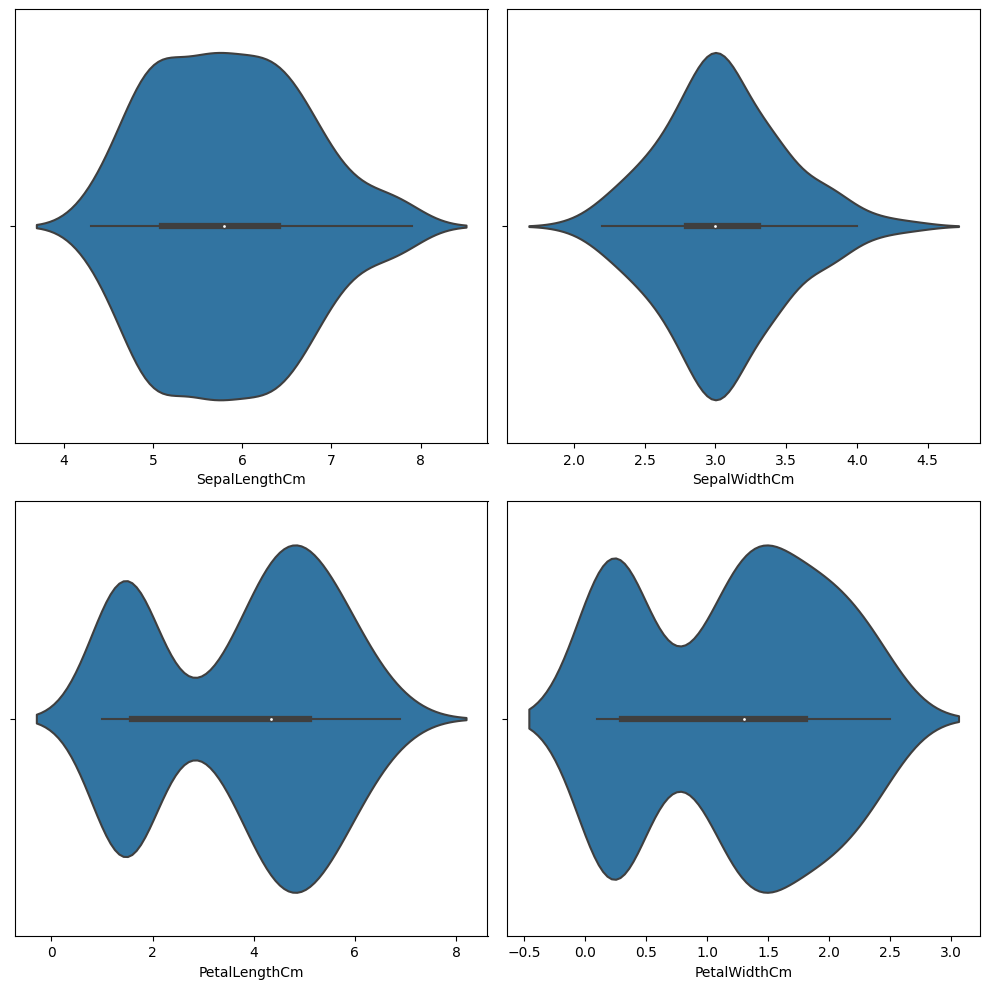

In [97]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

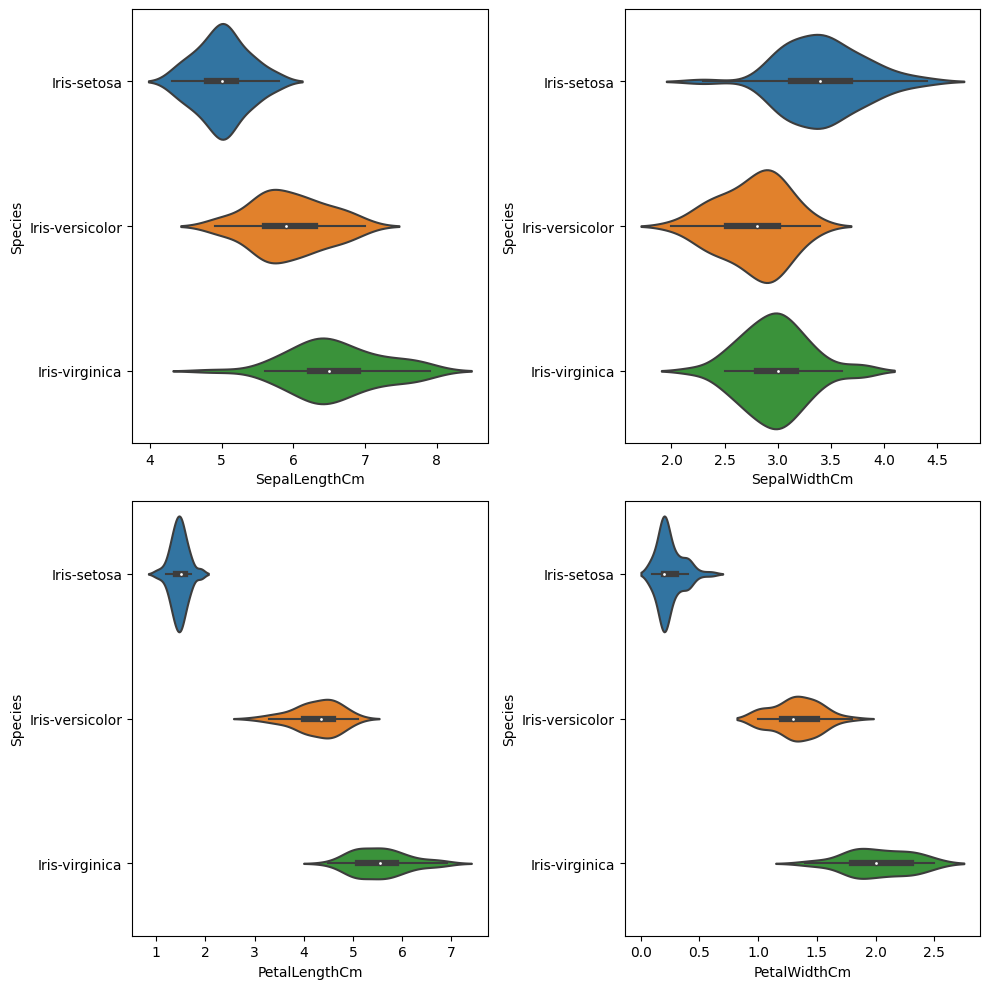

In [98]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], y=df["Species"], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

#### [stripplot] spread of the data with stripplot

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packa

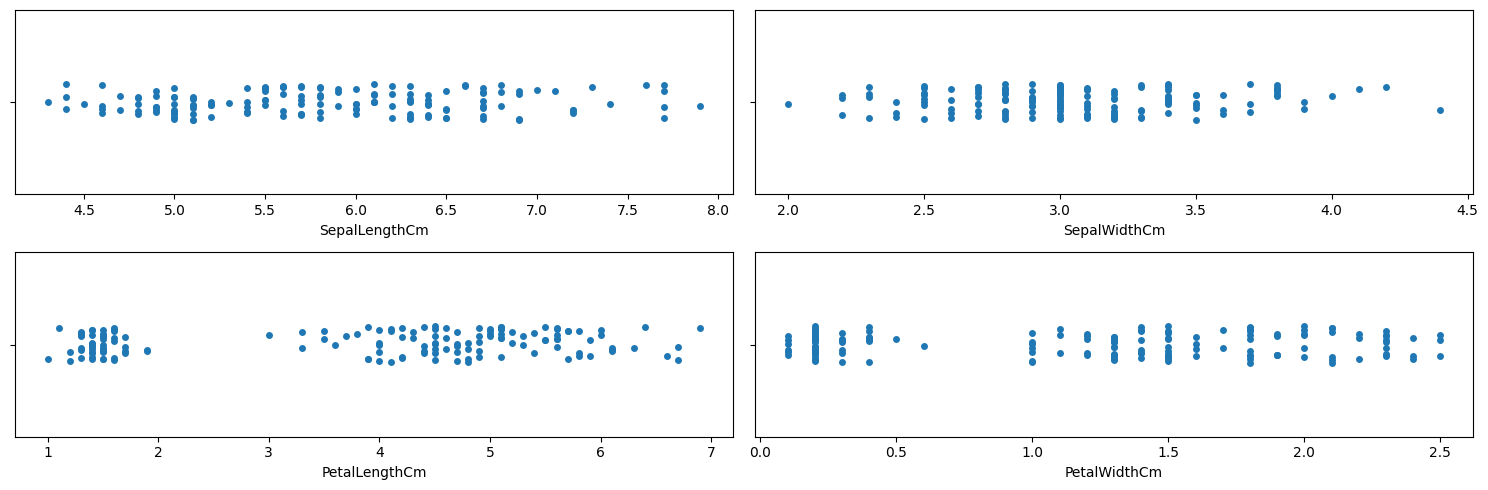

In [99]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packa

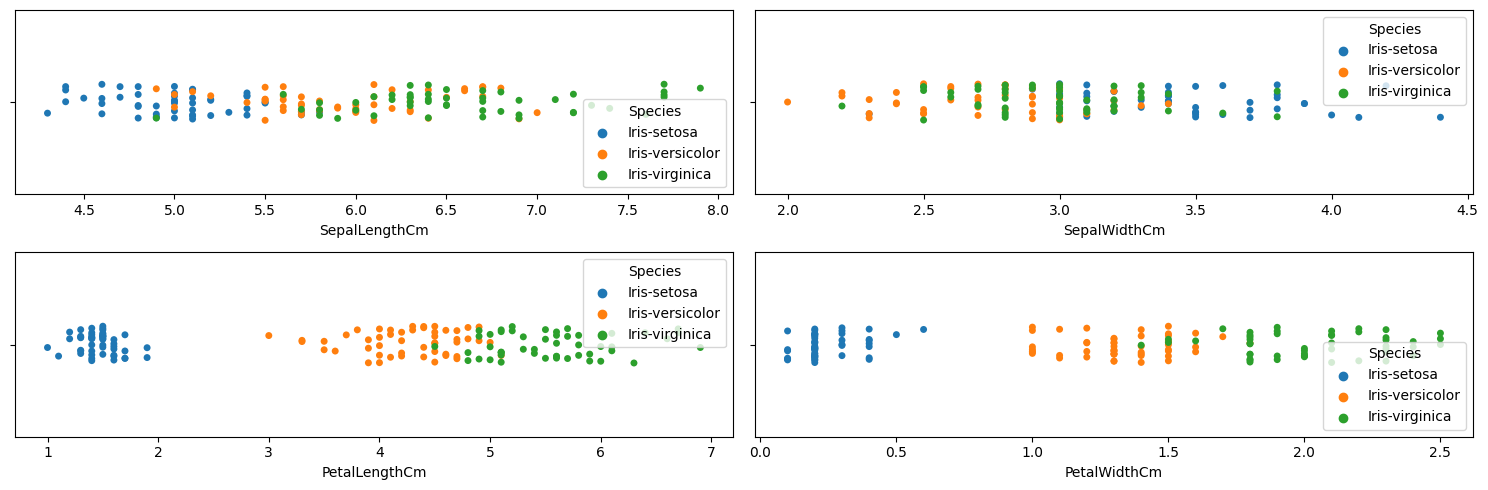

In [100]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], hue=df["Species"] ,ax=ax)
    
fig.tight_layout()  
plt.show()

#### [swarmplot] spread of the data with stripplot (avoids overlap)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packa

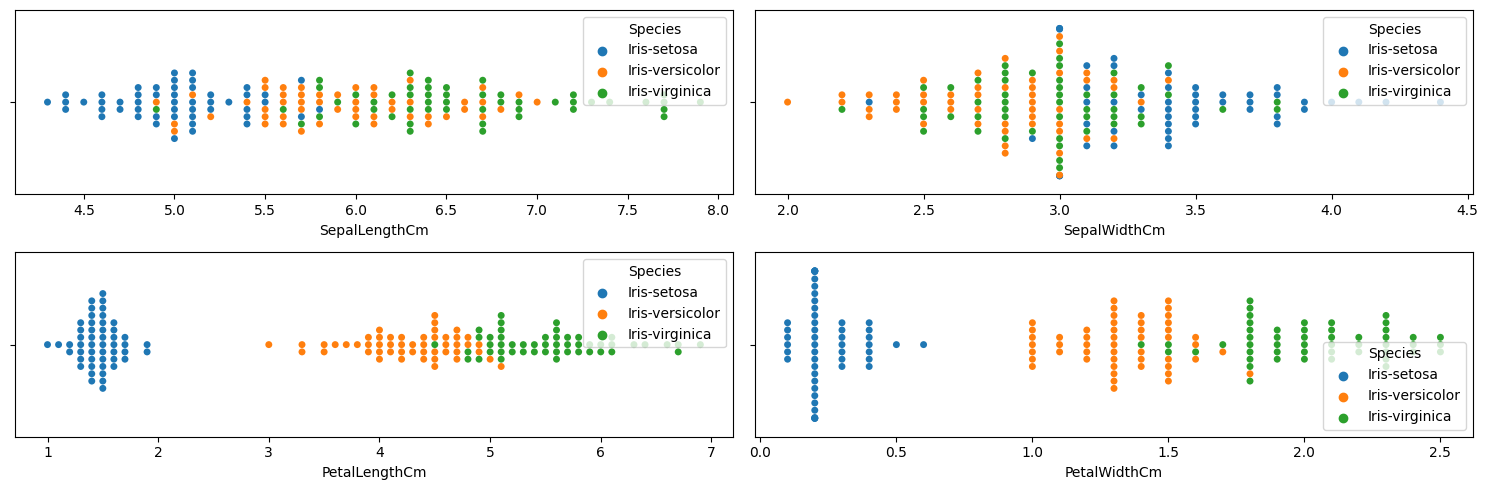

In [101]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # swarmplot
    sns.swarmplot(x=df[col], hue=df["Species"], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [scatterplot] Spread of data 

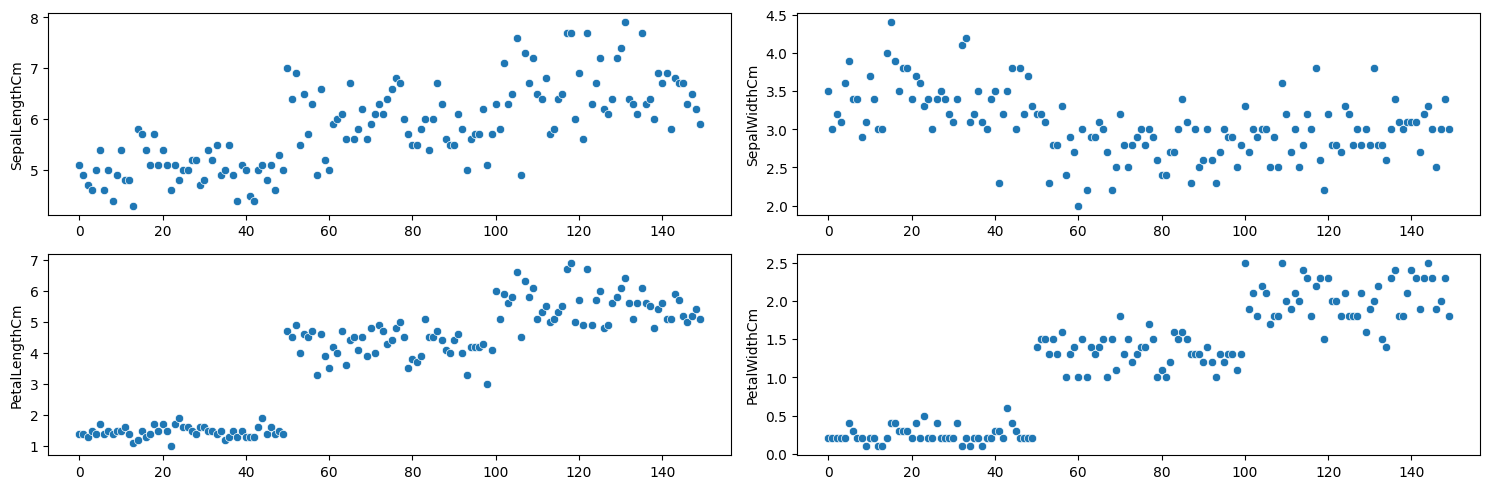

In [102]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # scatterplot
    sns.scatterplot(x = df[col].index, y= df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

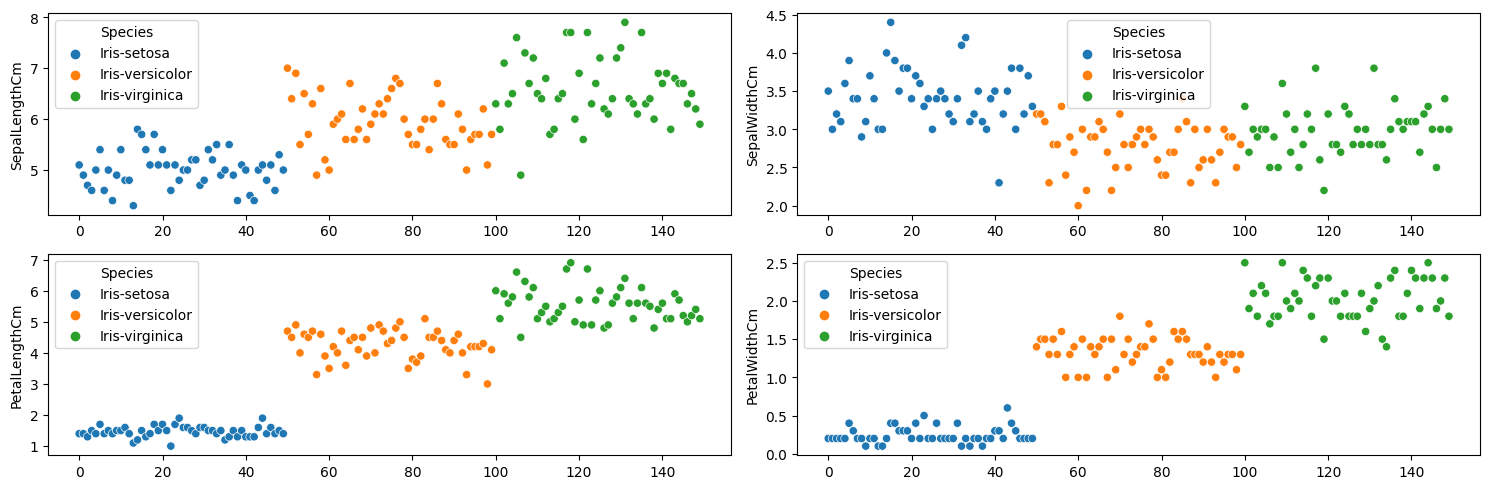

In [103]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)

    sns.scatterplot(x = df[col].index, y= df[col], hue=df["Species"], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [lineplot] Trend

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

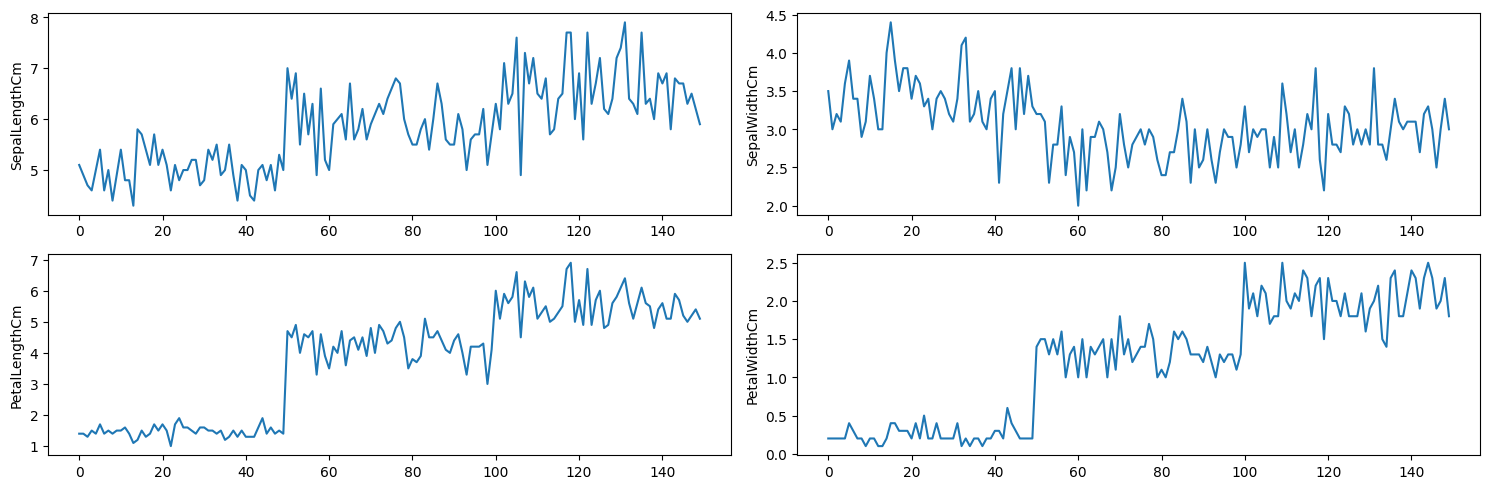

In [104]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\DELL\AppData\Local\Programs\Python\P

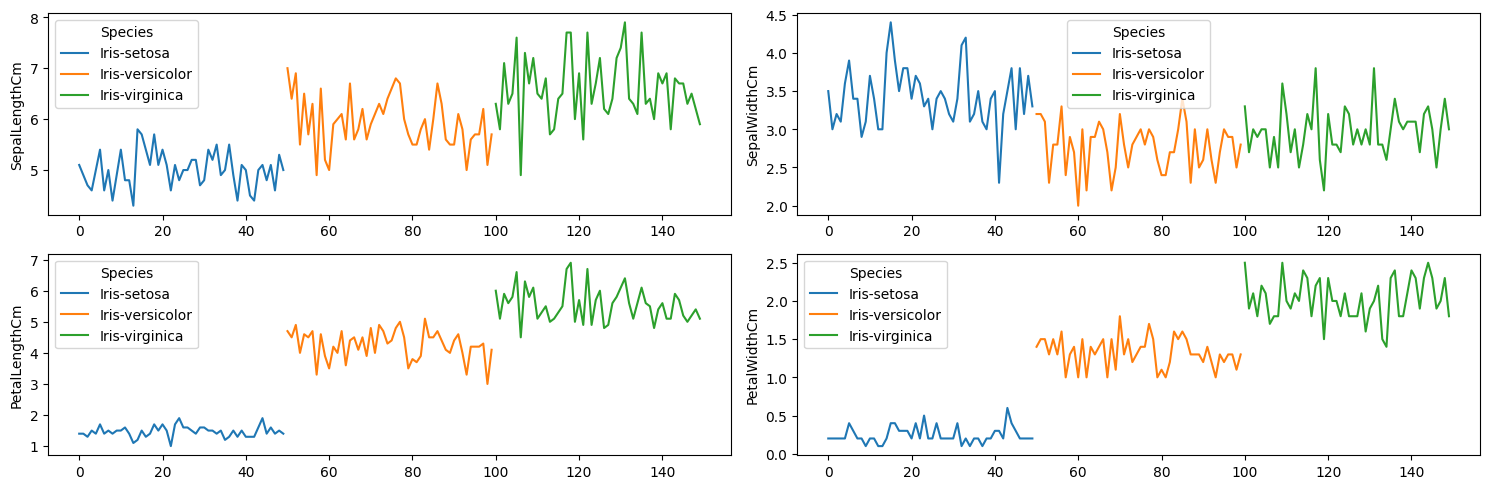

In [105]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], hue=df["Species"], ax=ax)
    
fig.tight_layout()  
plt.show()

### Bivariate & Multivariate Analysis

In [106]:
# Extracting the categories
cols, rows = 2, 2
num_cols = df.select_dtypes(exclude='category').columns
target_col = "Species"

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

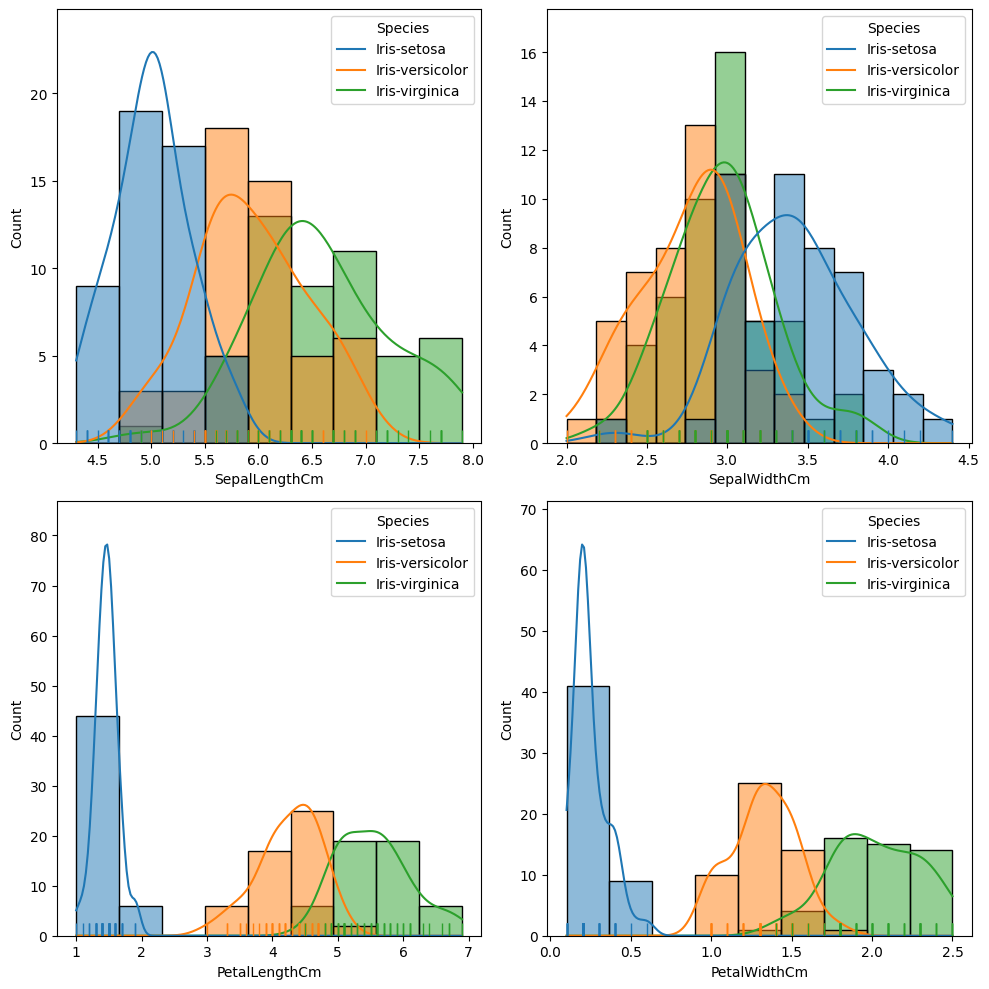

In [107]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, hue=target_col, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, hue=target_col, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

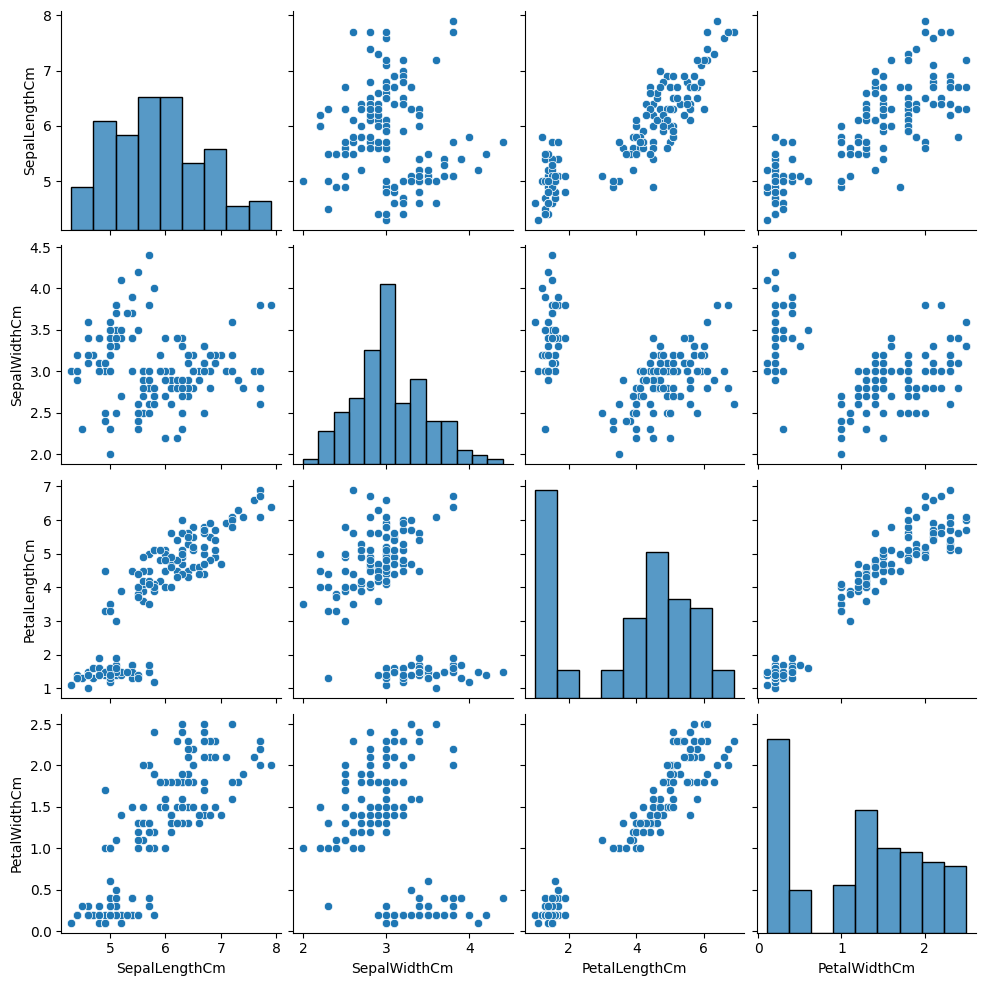

In [108]:
sns.pairplot(df)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

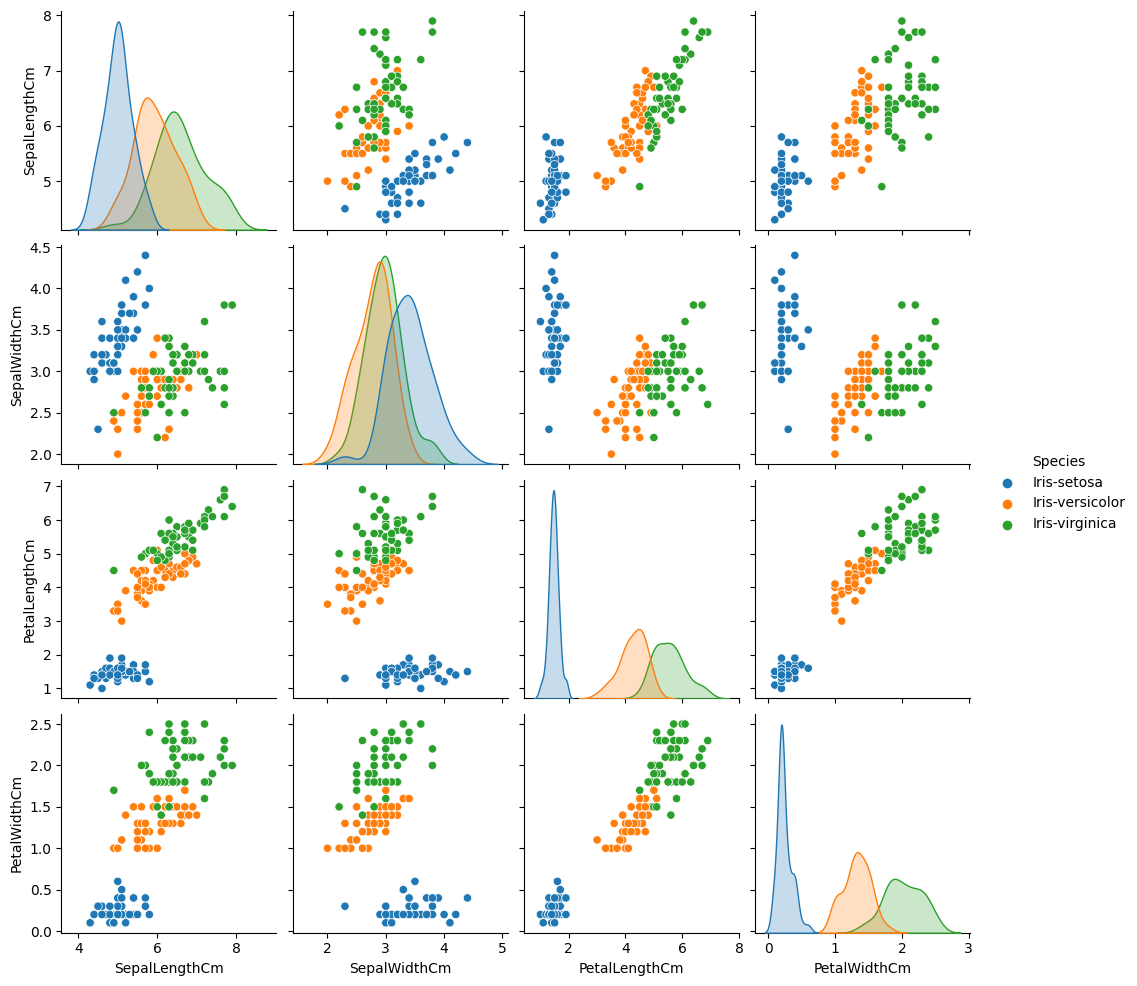

In [109]:
sns.pairplot(df, hue="Species")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\DELL\AppData\Local\Programs\Python\P

<Figure size 2000x2000 with 0 Axes>

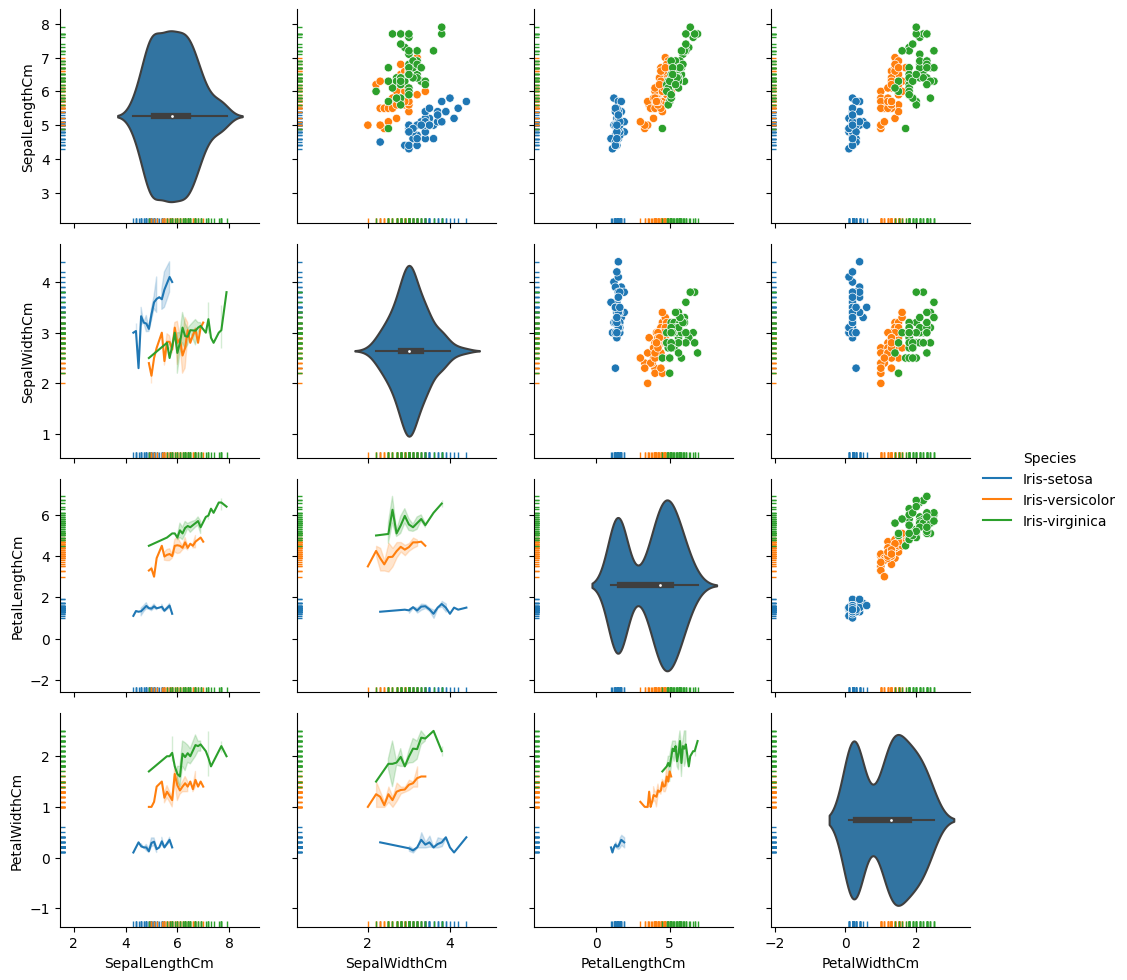

In [110]:
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df, hue="Species")
g.map_upper(sns.scatterplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.lineplot)
g.map(sns.rugplot)
g.add_legend()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\DELL\AppData\Local\Programs\Python\P

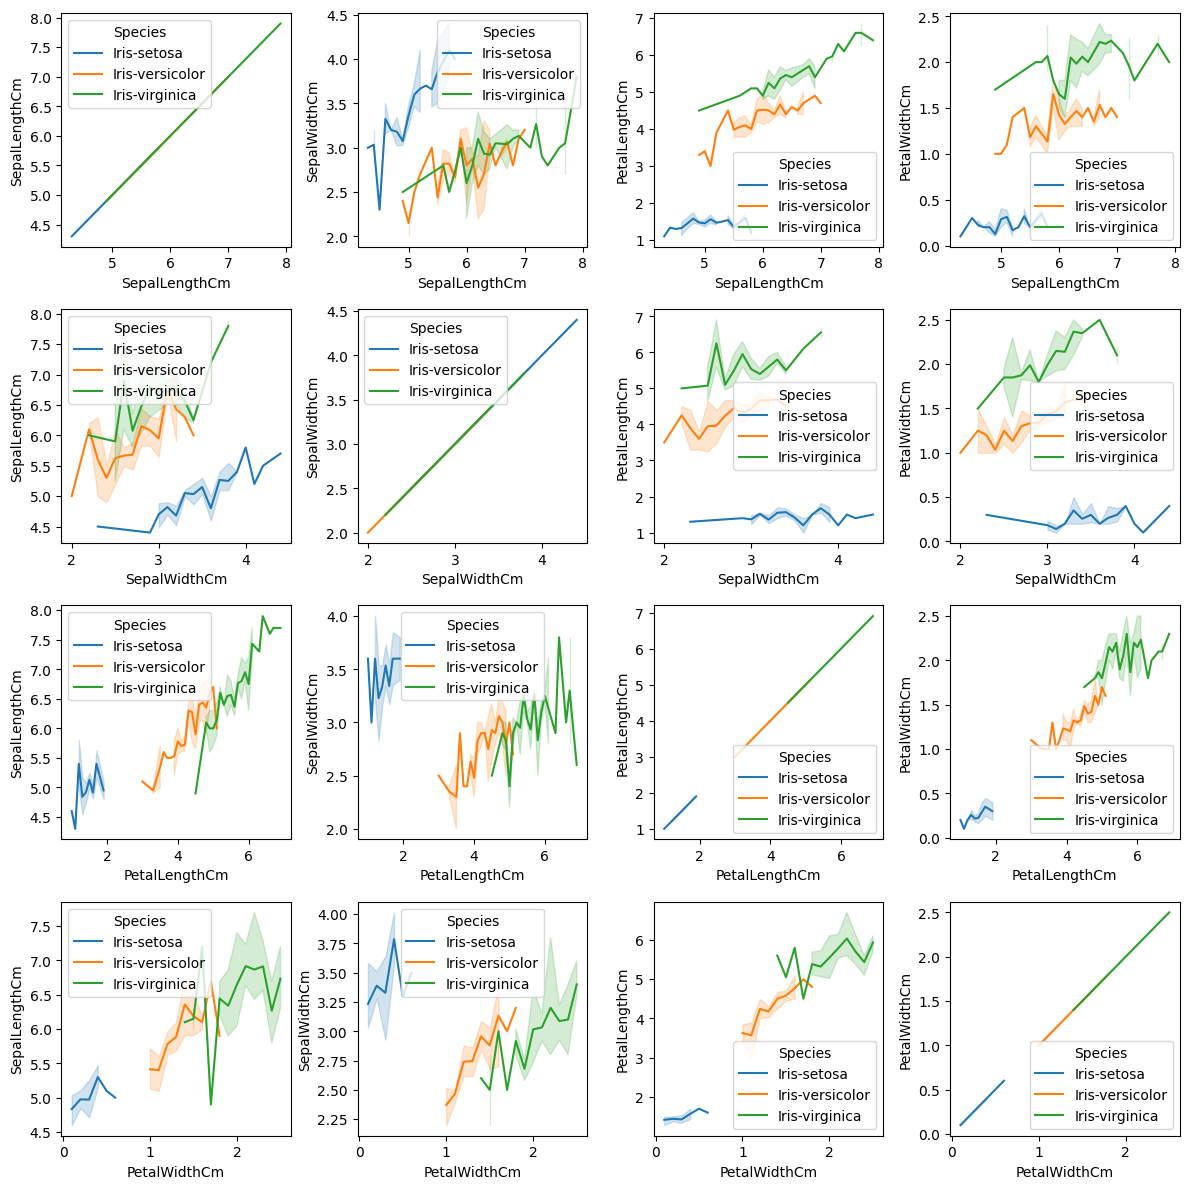

In [111]:
row_size, col_size = len(num_cols), len(num_cols)
fig = plt.figure( figsize=(row_size*3, row_size*3))
for i, row in enumerate(num_cols):
    for j, col in enumerate(num_cols):
        ax=fig.add_subplot(row_size, col_size, (i*col_size)+j+1)
        sns.lineplot(data= df, x=row, y=col, hue="Species", ax=ax)
        
fig.tight_layout()  
plt.show()

### Relations (Corr)

In [112]:
df_float64.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

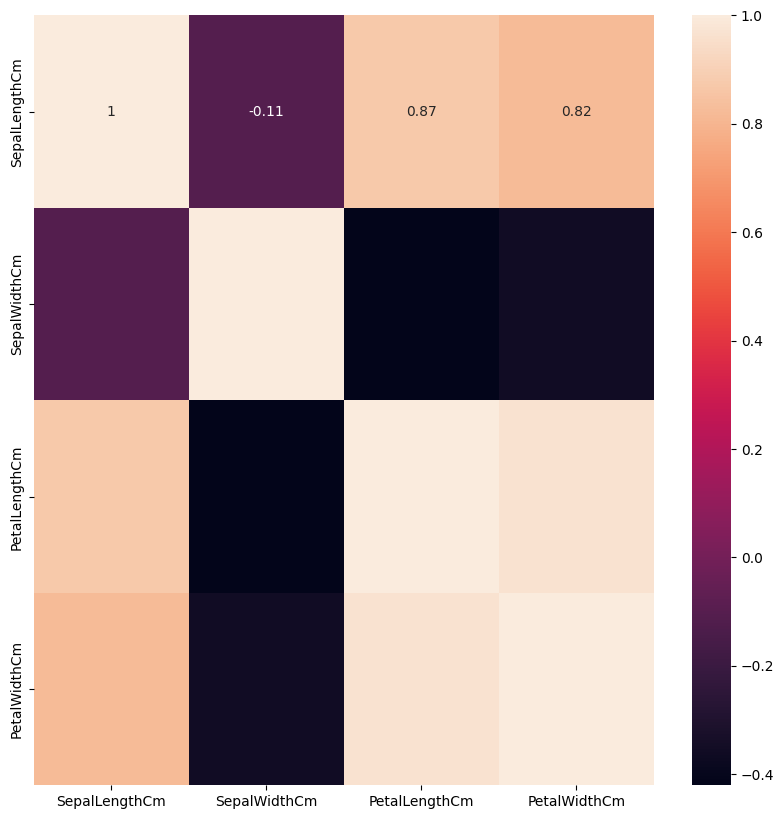

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df_float64.corr(), annot=True)

In [114]:
df_float64.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

In [115]:
# Calculate the covariance between the target and the feature
cov = {  col: [ np.cov(df["Species"].cat.codes, df[col])[0,1] ] for col in num_cols }
cov_s = pd.Series(np.squeeze(list(cov.values())), index=cov.keys())
cov_s

SepalLengthCm    0.530872
SepalWidthCm    -0.148993
PetalLengthCm    1.371812
PetalWidthCm     0.597987
dtype: float64

## Data Processing

### Encoding the target variable

In [116]:
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

In [117]:
df["Species"]= le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Determination the freatures and target variable

In [118]:
X = df.drop(columns=["Species"])
y=df['Species']

### Train Test Split

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.85)

## Model Selection

### Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix ,precision_score ,recall_score ,f1_score

LR_model = LogisticRegression(max_iter=1000,class_weight='balanced')
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred , average='macro')
recall = recall_score(y_test, y_pred , average='macro')
f1 = f1_score(y_test, y_pred , average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
CR_LG= classification_report(y_test, y_pred)
print(CR_LG)


Accuracy: 0.9453125
Precision: 0.9475127301214258
Recall: 0.9442508710801394
F1: 0.9436442116494496
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.87      0.98      0.92        41
           2       0.97      0.86      0.91        42

    accuracy                           0.95       128
   macro avg       0.95      0.94      0.94       128
weighted avg       0.95      0.95      0.95       128



### XGB Classifier

In [121]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit( X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb , average='macro')
recall = recall_score(y_test, y_pred_xgb , average='macro')
f1 = f1_score(y_test, y_pred_xgb , average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
CR_XGB=classification_report(y_test, y_pred_xgb)
print(CR_XGB)

Accuracy: 0.796875
Precision: 0.8118552935332106
Recall: 0.7903600464576074
F1: 0.7887087683512709
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        45
           1       0.73      0.59      0.65        41
           2       0.97      0.79      0.87        42

    accuracy                           0.80       128
   macro avg       0.81      0.79      0.79       128
weighted avg       0.81      0.80      0.79       128



### SVM


In [122]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# SVM Pipeline with StandardScaler (مفيد جدًا مع الـ SVM)
svm_model = make_pipeline(StandardScaler(with_mean=False), LinearSVC(max_iter=2000, random_state=42))

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm , average='macro')
recall = recall_score(y_test, y_pred_svm , average='macro')
f1 = f1_score(y_test, y_pred_svm , average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
CR_SVM=classification_report(y_test, y_pred_svm)
print(CR_SVM)


Accuracy: 0.953125
Precision: 0.9526029526029526
Recall: 0.9516066589237321
F1: 0.9517441860465117
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.95      0.90      0.93        41
           2       0.91      0.95      0.93        42

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128



### RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred_RF = clf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# تأكد إنهم من نفس النوع (أرقام)
accuracy = accuracy_score(y_test, y_pred_RF)
precision = precision_score(y_test, y_pred_RF, average='macro')
recall = recall_score(y_test, y_pred_RF, average='macro')
f1 = f1_score(y_test, y_pred_RF, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)


Accuracy: 0.9453125
Precision: 0.9450271950271949
Recall: 0.9440572977158342
F1-score: 0.9437424352457032
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.95      0.92        41
           2       0.95      0.88      0.91        42

    accuracy                           0.95       128
   macro avg       0.95      0.94      0.94       128
weighted avg       0.95      0.95      0.95       128



## Compare between 4 Models

In [124]:
from IPython.display import display, HTML

reports = {
    'Logistic Regression': CR_LG,
    'XGBoost': CR_XGB,
    'SVM': CR_SVM,
    'Random Forest': CR_RF
}

# Dark theme CSS styling
css = """
<style>
.report-container {
    display: flex;
    flex-wrap: wrap;
    gap: 20px;
    justify-content: center;
    margin-bottom: 30px;
    background-color: #121212;
    padding: 20px;
    border-radius: 8px;
}
.report-card {
    background: #1e1e1e;
    border-radius: 8px;
    box-shadow: 0 4px 8px rgba(0,0,0,0.3);
    padding: 18px;
    width: 45%;
    min-width: 300px;
    transition: all 0.3s ease;
    border-left: 4px solid;
}
.report-card:hover {
    transform: translateY(-3px);
    box-shadow: 0 6px 12px rgba(0,0,0,0.4);
}
.report-header {
    color: #ffffff;
    padding-bottom: 8px;
    margin-bottom: 12px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-weight: 600;
    font-size: 1.1em;
}
.report-content {
    font-family: 'Consolas', 'Courier New', monospace;
    font-size: 13px;
    line-height: 1.5;
    white-space: pre-wrap;
    overflow-x: auto;
    color: #d4d4d4;
}
.metric-highlight {
    font-weight: bold;
}
.precision {
    color: #4ec9b0;
}
.recall {
    color: #569cd6;
}
.f1score {
    color: #dcdcaa;
}
.support {
    color: #ce9178;
}
.accuracy {
    color: #b5cea8;
}
.model-Logistic {
    border-color: #4ec9b0;
}
.model-XGBoost {
    border-color: #569cd6;
}
.model-SVM {
    border-color: #dcdcaa;
}
.model-Random {
    border-color: #ce9178;
}
@media (max-width: 768px) {
    .report-card {
        width: 100%;
    }
}
</style>
"""

# HTML structure with dark theme
html = css + "<div class='report-container'>"
for model, report in reports.items():
    # Color code different metrics
    formatted_report = report.replace("precision", "<span class='metric-highlight precision'>precision</span>")
    formatted_report = formatted_report.replace("recall", "<span class='metric-highlight recall'>recall</span>")
    formatted_report = formatted_report.replace("f1-score", "<span class='metric-highlight f1score'>f1-score</span>")
    formatted_report = formatted_report.replace("support", "<span class='metric-highlight support'>support</span>")
    
    # Get model class for border coloring
    model_class = model.replace(" ", "-").split("-")[0]
    
    html += f"""
    <div class='report-card model-{model_class}'>
        <h3 class='report-header'>{model}</h3>
        <div class='report-content'>{formatted_report}</div>
    </div>
    """
html += "</div>"

display(HTML(html))

## Deployment

### Saving models

In [125]:
import pickle as plk

In [134]:
models = {
    'Logistic_Regression': LR_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Random_Forest': clf
}

for name, model in models.items():
    with open(f'{name}_model.pkl', 'wb') as f:
        plk.dump(model, f)
    print(f'Saved {name} to {name}_model.pkl')

Saved Logistic_Regression to Logistic_Regression_model.pkl
Saved XGBoost to XGBoost_model.pkl
Saved SVM to SVM_model.pkl
Saved Random_Forest to Random_Forest_model.pkl
